## The goal is to perform funnel analysis for an e-commerce website. The CEO isn't happy with the volume of sales, especially sales coming from new users. She would like two things:
### 1) A full picture of funnel conversion rate for both desktop and mobile
### 2) Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve

#### There are 4 stages in this funnel: home page -> search page ->  the payment page -> confirmation page
#### 
#### 

## 1) Preprocessing - accessing and exploring data - dealing with missing or nonsensical values, feature engineering

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [206]:
#importing data - all of these can be joined on the unique customer ID
users = pd.read_csv('user_table.csv')
home_page = pd.read_csv('home_page_table.csv')
payment_confirm = pd.read_csv('payment_confirmation_table.csv')
payment_page = pd.read_csv('payment_page_table.csv')
search_page = pd.read_csv('search_page_table.csv')

In [207]:
#Exploring users table
users.head() #I will need to encode device and sex with dummy variables

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [208]:
users.info() #Checking for null values - none so far 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [209]:
usersdevice = pd.get_dummies(users.device)
userssex = pd.get_dummies(users.sex)
usersdevice.head()

,Desktop,Mobile
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [210]:
users = users.join(usersdevice)
users = users.join(userssex)
users.drop(['device', 'sex'], axis=1, inplace=True)

users.head()

,user_id,date,Desktop,Mobile,Female,Male
0,450007,2015-02-28,1.0,0.0,1.0,0.0
1,756838,2015-01-13,1.0,0.0,0.0,1.0
2,568983,2015-04-09,1.0,0.0,0.0,1.0
3,190794,2015-02-18,1.0,0.0,1.0,0.0
4,537909,2015-01-15,1.0,0.0,0.0,1.0


In [211]:
#explore second table - home page
home_page.head() #I'll need to change the home_page column using get dummies

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [212]:
home_page.info() # no null numbers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [213]:
homepage = pd.get_dummies(home_page.page)
home_page = home_page.join(homepage)
home_page.drop('page', axis=1, inplace=True)
home_page.head()

,user_id,home_page
0,313593,1.0
1,468315,1.0
2,264005,1.0
3,290784,1.0
4,639104,1.0


In [214]:
home_page.groupby(["home_page"]).size() #Everybody went to the homepage, which makes sense. That's step 1 in the funnel
#They must go to the homepage to be included in the funnel analysis

home_page
1.0    90400
dtype: int64

In [215]:
#Looking at the 3rd table - second stage of the funnel
search_page.head() #Need to do the same with get_dummies

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [216]:
searchpage = pd.get_dummies(search_page.page)
search_page = search_page.join(searchpage)
search_page.drop('page', axis=1, inplace=True)
search_page.head()

,user_id,search_page
0,15866,1.0
1,347058,1.0
2,577020,1.0
3,780347,1.0
4,383739,1.0


In [217]:
search_page.groupby(["search_page"]).size() 

search_page
1.0    45200
dtype: int64

In [218]:
search_page.info() 
#there were 90,400 in the first table and only 45,200 here. The missing 45,000 didn't visit the search page

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id        45200 non-null int64
search_page    45200 non-null float64
dtypes: float64(1), int64(1)
memory usage: 706.3 KB


In [219]:
search_page.isnull().sum()

user_id        0
search_page    0
dtype: int64

In [220]:
#4th table
payment_page.head() #Need to transform the column into categorical variables

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [221]:
payment_page.info() #very few people are getting to the payment page

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [222]:
payment_page.isnull().sum() #no null values

user_id    0
page       0
dtype: int64

In [223]:
paymentpage = pd.get_dummies(payment_page.page)
payment_page = payment_page.join(paymentpage)
payment_page.head()

,user_id,page,payment_page
0,253019,payment_page,1.0
1,310478,payment_page,1.0
2,304081,payment_page,1.0
3,901286,payment_page,1.0
4,195052,payment_page,1.0


In [224]:
payment_page.drop('page', axis=1, inplace=True)
payment_page.head()

,user_id,payment_page
0,253019,1.0
1,310478,1.0
2,304081,1.0
3,901286,1.0
4,195052,1.0


In [225]:
#5th table - need to replace this with categorical variables. I'm going through each table individually to explore 
#missing values and unique aspects of each table, rather than changing all variables to get dummies in a for loop
payment_confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [226]:
payment_confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [227]:
confirmpage = pd.get_dummies(payment_confirm.page)
payment_confirm = payment_confirm.join(confirmpage)
payment_confirm.drop(['page'], axis=1, inplace=True)
payment_confirm.head()

,user_id,payment_confirmation_page
0,123100,1.0
1,704999,1.0
2,407188,1.0
3,538348,1.0
4,841681,1.0


In [228]:
payment_confirm.groupby(["payment_confirmation_page"]).size() #only 452 people made purchases!

payment_confirmation_page
1.0    452
dtype: int64

## 2) Merging all datasets into one


In [229]:
## Now I will merge all data sets on unique ID - I will do this one by one to make sure we're not losing info

In [230]:
alldata  = pd.merge(users,home_page, on=['user_id'], how='outer')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 7 columns):
user_id      90400 non-null int64
date         90400 non-null object
Desktop      90400 non-null float64
Mobile       90400 non-null float64
Female       90400 non-null float64
Male         90400 non-null float64
home_page    90400 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.5+ MB


In [231]:
alldata  = pd.merge(alldata,search_page, on=['user_id'], how='outer')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id        90400 non-null int64
date           90400 non-null object
Desktop        90400 non-null float64
Mobile         90400 non-null float64
Female         90400 non-null float64
Male           90400 non-null float64
home_page      90400 non-null float64
search_page    45200 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [232]:
alldata  = pd.merge(alldata,payment_page, on=['user_id'], how='outer')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 9 columns):
user_id         90400 non-null int64
date            90400 non-null object
Desktop         90400 non-null float64
Mobile          90400 non-null float64
Female          90400 non-null float64
Male            90400 non-null float64
home_page       90400 non-null float64
search_page     45200 non-null float64
payment_page    6030 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [233]:
alldata  = pd.merge(alldata,payment_confirm, on=['user_id'], how='outer')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 10 columns):
user_id                      90400 non-null int64
date                         90400 non-null object
Desktop                      90400 non-null float64
Mobile                       90400 non-null float64
Female                       90400 non-null float64
Male                         90400 non-null float64
home_page                    90400 non-null float64
search_page                  45200 non-null float64
payment_page                 6030 non-null float64
payment_confirmation_page    452 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 7.6+ MB


## 3) Exploring data trends by sex - plotting number of users by sex in the various stages of the funnel

In [548]:
pages = ['home_page','search_page','payment_page','payment_confirmation_page']

In [549]:
bysex = alldata.groupby(['Male','Female']).count()
bysex

,,user_id,date,Desktop,Mobile,home_page,search_page,payment_page,payment_confirmation_page,year,month,day,weekday
Male,Female,,,,,,,,,,,,
0.0,1.0,45075,45075,45075,45075,45075,22676,3100,241,45075,45075,45075,45075
1.0,0.0,45325,45325,45325,45325,45325,22524,2930,211,45325,45325,45325,45325


In [550]:
bysex.reset_index(inplace=True) #Need to reset the index so I can use Male and Female to group data

In [551]:
male = bysex[bysex['Male'] == 1] #Creating a dataframe of # males users per stage of the funnel
male = male[pages]
male = male.transpose()
male.rename(columns={1: "Male"}, inplace=True)
male.head()

,Male
home_page,45325
search_page,22524
payment_page,2930
payment_confirmation_page,211


In [552]:
female = bysex[bysex['Female'] == 1] #Creating a dataframe of # female users per stage of the funnel
female = female[pages]
female = female.transpose()
female.rename(columns={0: "Female"}, inplace=True)
female.head()

,Female
home_page,45075
search_page,22676
payment_page,3100
payment_confirmation_page,241


In [553]:
female['Male'] = male['Male'] #Merging male and female data to create one dataframe for easier plotting
pages_sex = female
pages_sex.reset_index(inplace=True) #Resetting index so that the stages of the funnel are part of a column -
# This is for efficiency during plotting
pages_sex.rename(columns={'index': "Page"}, inplace=True)
pages_sex.head()

,Page,Female,Male
0,home_page,45075,45325
1,search_page,22676,22524
2,payment_page,3100,2930
3,payment_confirmation_page,241,211


In [554]:
import seaborn as sns
sns.set_style('dark')

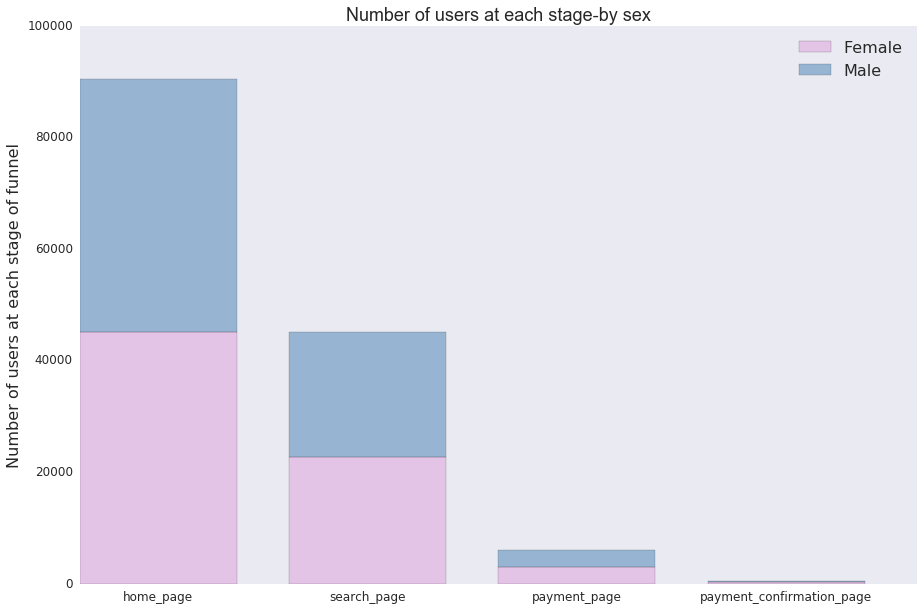

In [555]:
f, ax1 = plt.subplots(1, figsize=(15,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(pages_sex['Female']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the Female data
        pages_sex['Female'], 
        # set the width
        width=bar_width,
        # with the label 'Female'
        label='Female', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='plum')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the mid_score data
        pages_sex['Male'], 
        # set the width
        width=bar_width,
        # with Female on the bottom
        bottom=pages_sex['Female'], 
        # with the label 'Male'
        label='Male', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='steelblue')

plt.xticks(tick_pos, pages_sex['Page'], size=12)
plt.yticks(size=12)
plt.ylabel("Number of users at each stage of funnel", size=16)
plt.title("Number of users at each stage-by sex", size=18)
plt.legend(loc='upper right', prop={'size':16})
fig.tight_layout()
plt.show()


## 4) Exploring data trends by device type - plotting number of users by device type in the various stages of the funnel

In [342]:
bydevice = alldata.groupby(['Desktop','Mobile']).count()
bydevice

,,user_id,date,Female,Male,home_page,search_page,payment_page,payment_confirmation_page
Desktop,Mobile,,,,,,,,
0.0,1.0,30200,30200,30200,30200,30200,15100,3020,302
1.0,0.0,60200,60200,60200,60200,60200,30100,3010,150


In [343]:
bydevice.reset_index(inplace=True) #Resetting index so I can use device type for groupby

In [345]:
desk = bydevice[bydevice['Desktop'] == 1]
desk = desk[pages]
desk = desk.transpose()
desk.rename(columns={1: "Desktop"}, inplace=True)
desk.head() #grouping all of the desktop data together

,Desktop
home_page,60200
search_page,30100
payment_page,3010
payment_confirmation_page,150


In [352]:
mobile = bydevice[bydevice['Mobile'] == 1]
mobile = mobile[pages]
mobile = mobile.transpose()
mobile.rename(columns={0: "Mobile"}, inplace=True)
mobile.head() #grouping all of the mobile data together

,Mobile
home_page,30200
search_page,15100
payment_page,3020
payment_confirmation_page,302


In [360]:
desk['Mobile'] = mobile['Mobile'] #Merging Desktop and Mobile sums into one DF for easier plotting
pages_device = desk
pages_device.reset_index(inplace=True) #Resetting index 
pages_device.rename(columns={'index': "Page"}, inplace=True)
pages_device.head() #Creating one dataframe of desktop and mobile data

,Page,Desktop,Mobile
0,home_page,60200,30200
1,search_page,30100,15100
2,payment_page,3010,3020
3,payment_confirmation_page,150,302


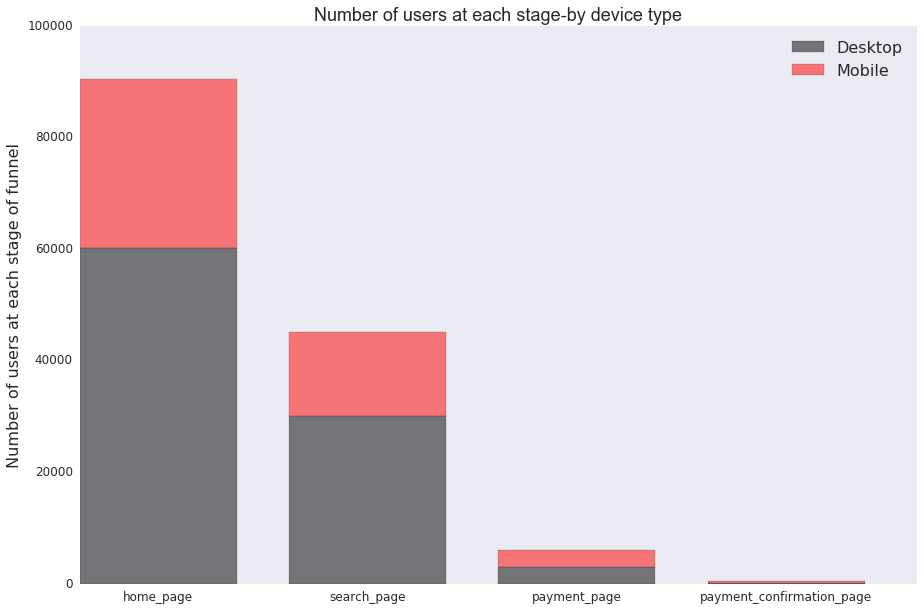

In [365]:
f, ax1 = plt.subplots(1, figsize=(15,10))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(pages_device['Desktop']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the desktop data
        pages_device['Desktop'], 
        # set the width
        width=bar_width,
        # with the label Desktop
        label='Desktop', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='black')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the Mobile
        pages_device['Mobile'], 
        # set the width
        width=bar_width,
        # with desktop on the bottom
        bottom=pages_device['Desktop'], 
        # with the label mobile
        label='Mobile', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red')

plt.xticks(tick_pos, pages_device['Page'], size=12)
plt.yticks(size=12)
plt.ylabel("Number of users at each stage of funnel", size=16)
plt.title("Number of users at each stage-by device type", size=18)
plt.legend(loc='upper right', prop={'size':16})
fig.tight_layout()
plt.show()


In [366]:
alldata.head()

,user_id,date,Desktop,Mobile,Female,Male,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
1,756838,2015-01-13,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,568983,2015-04-09,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN
3,190794,2015-02-18,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
4,537909,2015-01-15,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


In [368]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 10 columns):
user_id                      90400 non-null int64
date                         90400 non-null object
Desktop                      90400 non-null float64
Mobile                       90400 non-null float64
Female                       90400 non-null float64
Male                         90400 non-null float64
home_page                    90400 non-null float64
search_page                  45200 non-null float64
payment_page                 6030 non-null float64
payment_confirmation_page    452 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 7.6+ MB


## 5) Exploring data trends by time - plotting number of users over time in the various stages of the funnel

In [369]:
import datetime

In [385]:
alldata['date'] = pd.to_datetime(alldata['date']) #Need to convert the date in string format to a pandas datetime object
# for manipulation purposes
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 11 columns):
user_id                      90400 non-null int64
date                         90400 non-null datetime64[ns]
Desktop                      90400 non-null float64
Mobile                       90400 non-null float64
Female                       90400 non-null float64
Male                         90400 non-null float64
home_page                    90400 non-null float64
search_page                  45200 non-null float64
payment_page                 6030 non-null float64
payment_confirmation_page    452 non-null float64
year                         90400 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 7.9 MB


In [422]:
alldata['year'] = pd.DatetimeIndex(alldata['date']).year #Adding year to a separate column

In [423]:
alldata['month'] = pd.DatetimeIndex(alldata['date']).month #Adding month to a separate column

In [424]:
alldata['day'] = pd.DatetimeIndex(alldata['date']).day #Adding day to a separate column

In [484]:
alldata['weekday'] = pd.DatetimeIndex(alldata['date']).weekday #Adding day to a separate column

In [485]:
alldata.head() 

,user_id,date,Desktop,Mobile,Female,Male,home_page,search_page,payment_page,payment_confirmation_page,year,month,day,weekday
0,450007,2015-02-28,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,2015,2,28,5
1,756838,2015-01-13,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,2015,1,13,1
2,568983,2015-04-09,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,2015,4,9,3
3,190794,2015-02-18,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,2015,2,18,2
4,537909,2015-01-15,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,2015,1,15,3


In [426]:
year = alldata.groupby('year').count()

In [455]:
month = alldata.groupby('month').count() #There are only 4 months?

In [474]:
day = alldata.groupby('day').count()

In [486]:
weekday = alldata.groupby('weekday').count()

In [429]:
year = year[pages] #There is only one year in this data so we cannot make any conclusions about the effect of year of the
#user funnel (ie we cannot say this is a more recent trend)

In [456]:
month = month[pages]

In [457]:
month = month.reset_index()
month = month.transpose()
month

,0,1,2,3
month,1,2,3,4
home_page,22600,22600,22600,22600
search_page,13554,13687,8879,9080
payment_page,2390,2412,631,597
payment_confirmation_page,189,173,44,46


In [468]:
month.rename(columns={0:'January', 1:'February', 2:'March', 3:'April'}, inplace=True)

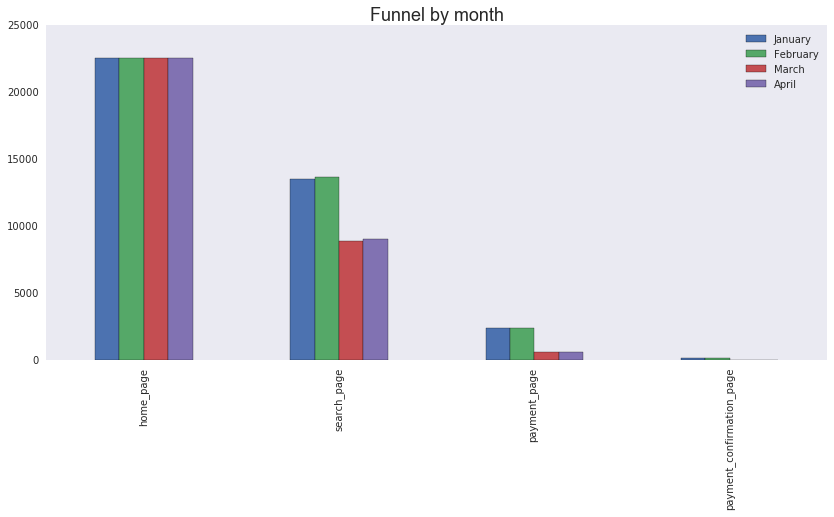

In [471]:
month[1:].plot(kind='bar', figsize = (14,6))
plt.title('Funnel by month', size = 18)
plt.show()

In [475]:
day = day[pages]

In [476]:
day = day.reset_index()
day = day.transpose()
day

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
home_page,3031,3048,3075,2973,3006,3035,3036,3143,2996,3020,...,3051,3053,2964,3133,3022,3025,3007,2198,2275,1444
search_page,1523,1512,1477,1515,1518,1529,1509,1549,1500,1548,...,1568,1526,1453,1618,1480,1497,1542,1005,1057,728
payment_page,215,202,193,209,218,179,187,209,212,190,...,190,193,198,220,209,207,202,105,100,110
payment_confirmation_page,15,15,21,18,20,20,17,13,20,12,...,13,17,18,14,14,10,17,6,6,8


In [513]:
w = list(day.columns.values)

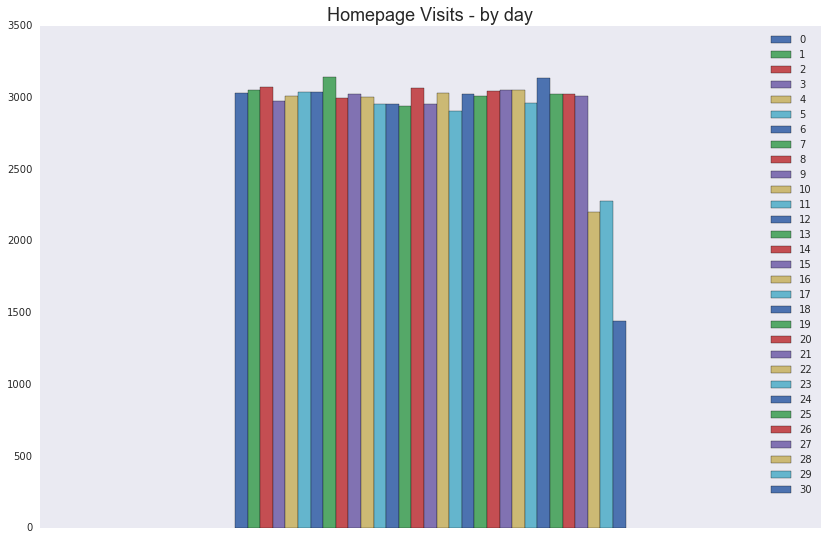

In [515]:
a = day[1:2].plot(kind='bar', figsize = (14,9))
plt.title('Homepage Visits - by day', size = 18)
a.xaxis.set_visible(False)
plt.show()

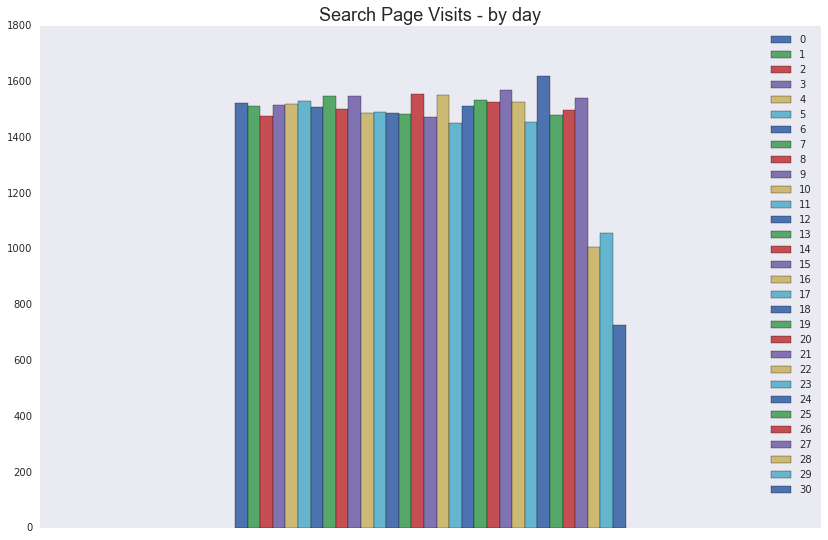

In [495]:
b = day[2:3].plot(kind='bar', figsize = (14,9))
plt.title('Search Page Visits - by day', size = 18)
b.xaxis.set_visible(False)
plt.show()

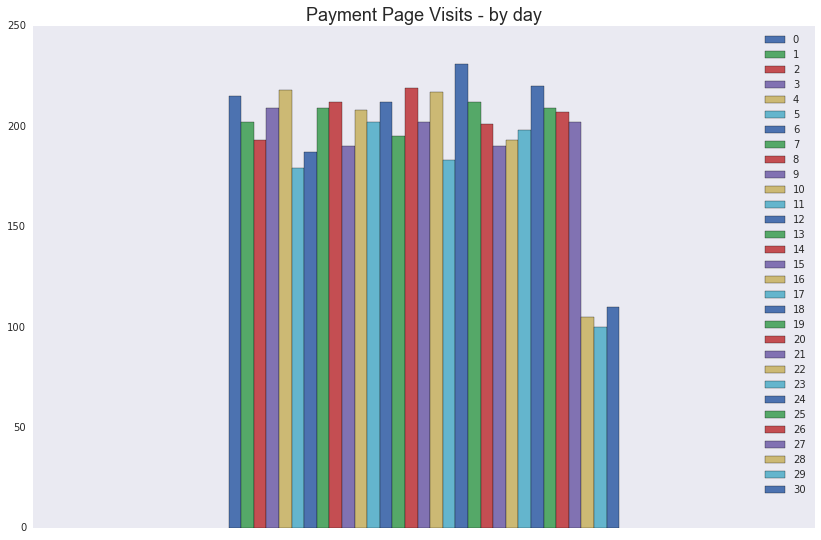

In [496]:
c = day[3:4].plot(kind='bar', figsize = (14,9))
plt.title('Payment Page Visits - by day', size = 18)
c.xaxis.set_visible(False)
plt.show()

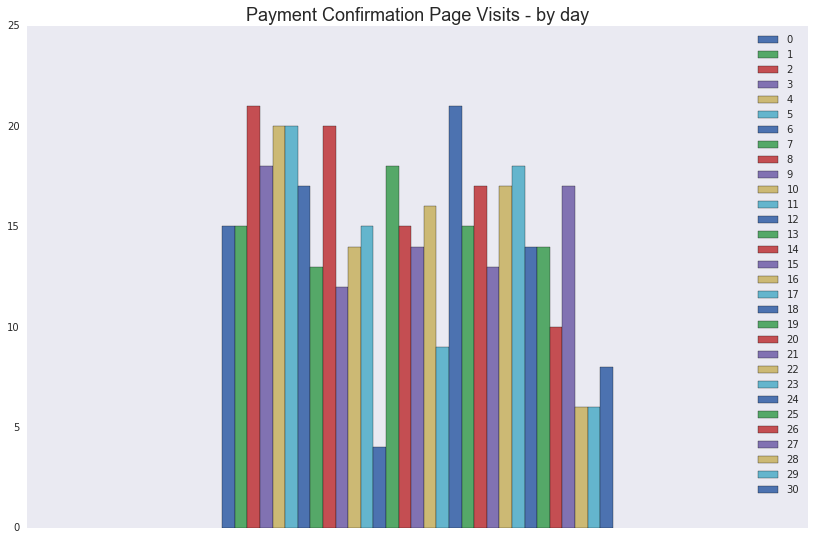

In [510]:
d = day[4:5].plot(kind='bar', figsize = (14,9))
plt.title('Payment Confirmation Page Visits - by day', size = 18)
d.xaxis.set_visible(False)
plt.show()

In [516]:
#It looks a little messy to look at this by day - So i will plot by day of the week

In [621]:
week = weekday[pages]

In [622]:
week = week.reset_index()
week = week.transpose()
week

,0,1,2,3,4,5,6
weekday,0,1,2,3,4,5,6
home_page,12955,12697,12831,13444,12750,12801,12922
search_page,6483,6252,6335,6717,6406,6545,6462
payment_page,869,853,838,899,871,845,855
payment_confirmation_page,77,69,54,66,54,70,62


In [623]:
week.rename(columns={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

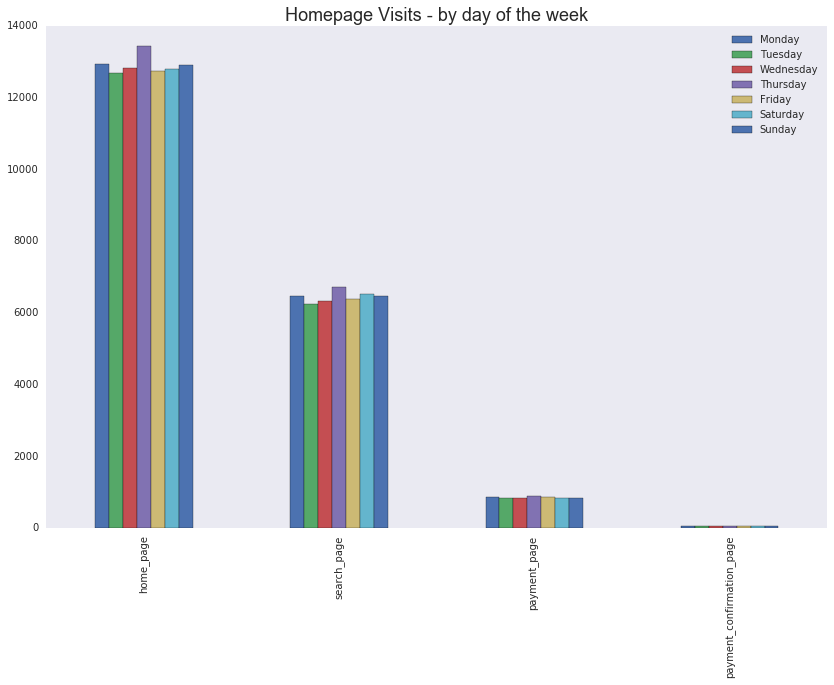

In [624]:
e = week[1:].plot(kind='bar', figsize = (14,9))
plt.title('Homepage Visits - by day of the week', size = 18)
plt.show()

In [625]:
week

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday,0,1,2,3,4,5,6
home_page,12955,12697,12831,13444,12750,12801,12922
search_page,6483,6252,6335,6717,6406,6545,6462
payment_page,869,853,838,899,871,845,855
payment_confirmation_page,77,69,54,66,54,70,62


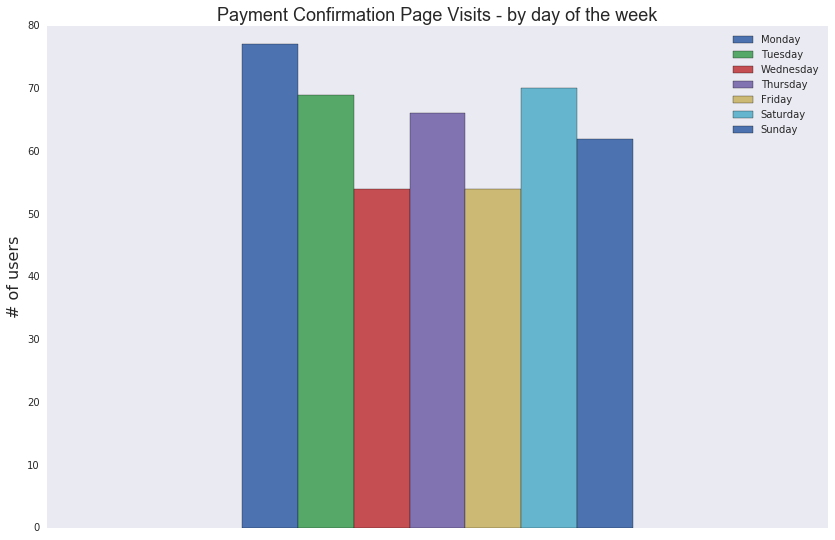

In [626]:
#Investigating the payment_confirmation page since it is hard to see with the scale above
e = week[4:].plot(kind='bar', figsize = (14,9))
plt.title('Payment Confirmation Page Visits - by day of the week', size = 18)
plt.ylabel('# of users', size=16)
e.xaxis.set_visible(False)
plt.show()

## 6) Calculations

In [576]:
# total number of converted users
"Percent of converted users is %s %%" % ((alldata['payment_confirmation_page'].sum() / alldata['home_page'].sum())*100)

'Percent of converted users is 0.5 %'

In [582]:
"Percent of users that go on to search page from home page  is %s %%" % ((alldata['search_page'].sum() / 
                                                                          alldata['home_page'].sum())*100)

'Percent of users that go on to search page from home page  is 50.0 %'

In [583]:
"Percent of users that go on to payment page from search page  is %s %%" % ((alldata['payment_page'].sum() / 
                                                                          alldata['search_page'].sum())*100)

'Percent of users that go on to payment page from search page  is 13.3407079646 %'

In [585]:
"Percent of users that go on to payment confirmation page from payment page  is %s %%" % ((
        alldata['payment_confirmation_page'].sum() /alldata['payment_page'].sum())*100)

'Percent of users that go on to payment confirmation page from payment page  is 7.49585406302 %'

In [591]:
"Percent of users that land on the homepage using a Desktop %s %%" % ((desk.Desktop[0]/alldata['home_page'].sum())*100)

'Percent of users that land on the homepage using a Desktop 66.592920354 %'

In [592]:
"Percent of users that land on the homepage using a Desktop %s %%" % ((desk.Desktop[1]/alldata['search_page'].sum())*100)

'Percent of users that land on the homepage using a Desktop 66.592920354 %'

In [598]:
"Percent of users that land on the payment page using a Desktop %s %%" % ((desk.Desktop[2]/alldata['payment_page'].sum())*100)

'Percent of users that land on the payment page using a Desktop 49.9170812604 %'

In [600]:
"Percent of users that land on the payment page using a Desktop %s %%" % ((
        desk.Desktop[3]/alldata['payment_confirmation_page'].sum())*100)

'Percent of users that land on the payment page using a Desktop 33.185840708 %'

In [610]:
print '''There were %s total users that landed on the search page in Jan and Feb compared to %s users in March and 
April.''' % ((month.January[2]+month.February[2]), (month.March[2]+month.April[2]))

There were 27241 total users that landed on the search page in Jan and Feb compared to 17959 users in March and 
April.


In [611]:
print '''There were %s total users that landed on the payment page in Jan and Feb compared to %s users in March and 
April.''' % ((month.January[3]+month.February[3]), (month.March[3]+month.April[3]))

There were 4802 total users that landed on the payment page in Jan and Feb compared to 1228 users in March and 
April.


In [613]:
print '''There were %s total users that landed on the payment confirmation page in Jan and Feb compared to %s users
in March and April.''' % ((month.January[4]+month.February[4]), (month.March[4]+month.April[4]))

There were 362 total users that landed on the payment confirmation page in Jan and Feb compared to 90 users
in March and April.


In [601]:
month.January[0]+month.February[0]+

,January,February,March,April
month,1,2,3,4
home_page,22600,22600,22600,22600
search_page,13554,13687,8879,9080
payment_page,2390,2412,631,597
payment_confirmation_page,189,173,44,46


## 7) Conclusions and Insights

#### About half of users visit the Search Page. From there only about 13%  go on to the payment page with only 452 user ending in a purchase - or 0.5% of the original user base. 

#### Interestingly about 67% of users land on the home page or search page using a Desktop compared to a mobile.
#### However Desktop and Mobile users landed on the payment page with similar frequency. Interestingly, more Mobile users ended with a purchase compared to Desktop users (66% of those that made a purchase were Mobile users.

#### Since all data was from 2015, I was unable to compare if 2015 was worse in sales compared to other years. Likewise, since data was only available for the first 4 months of the year I could only make data comparisons of the first 4 months. Users that landed on the payment page and payment confirmation page about 4 times as often in January and February compared to March and April. 

#### Less users visited each stage of the funnel on the last 3 days of each month. This trend was more prominent on the payment page and payment confirmation pages for which the frequency of user visits was reduced by approximately half on the last 3 days of each month.

### Some insights:
### 1) There is a huge decrease from users that land of the search page compared to the payment page, suggesting that something about the search page does not lend itself to users wanting to purchase an item. Possibile reasons for this and avenues to pursue are bugs on the search page, correct/enticing description of items, improving the layout of the search page so its conducive to people clicking to the next page. 
### 2) Users reaching the payment and payment confirmation pages dropsoff towards the end of the month. Perhaps promotions could be offered at these times to boost sales. 